In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [17]:
train_data = np.loadtxt("./sample_data/mnist_train_small.csv", delimiter=",")
test_data = np.loadtxt("./sample_data/mnist_test.csv", delimiter=",")

In [21]:
train_x_data = train_data[:,1:]
train_t_data = train_data[:,0]

In [31]:
a = train_t_data.astype("int32")
train_t_data_onehot = np.zeros((a.size, a.max()+1))
train_t_data_onehot[np.arange(a.size),a] = 1
train_t_data_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [27]:
train_t_data

array([6., 5., 7., ..., 2., 9., 5.])

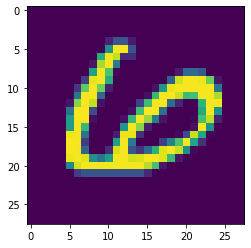

In [35]:
plt.imshow(train_x_data[0].reshape(28,28))

In [36]:
train_t_data_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [32]:
#x_data = [[0,0],[0,1],[1,0],[1,1]]
#t_data = [[0],[1],[1],[0]]
#x_data = np.array(x_data)
#t_data = np.array(t_data)
#t_data = [0,1,1,0]

In [37]:
W2 = np.random.rand(784,30)
b2 = np.random.rand(30)
W3 = np.random.rand(30,10)
b3 = np.random.rand(10)

In [38]:
def sigmoid(z):
  return 1 / (1+np.exp(-z)) 

def bce(X, target):
  delta = 1e-8
  z2 = np.dot(X,W2)+b2
  a2 = sigmoid(z2)

  z3 = np.dot(a2,W3)+b3
  a3 = sigmoid(z3)

  return -np.sum(target*np.log(a3+delta) + (1-target) * np.log((1-a3)+delta))


In [39]:
bce(train_x_data, train_t_data_onehot)

2691887.060134372

In [40]:
# 수치미분 함수
def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [48]:
learning_rate = 0.1
for idx in range(1000):
  for idx in range(len(train_t_data)):
    bceF = lambda x: bce(train_x_data[idx], train_t_data_onehot[idx])
    W2_grad = numerical_derivative(bceF, W2)
    b2_grad = numerical_derivative(bceF, b2)
    W3_grad = numerical_derivative(bceF, W3)
    b3_grad = numerical_derivative(bceF, b3)

    W2 = W2 - learning_rate*W2_grad
    b2 = b2 - learning_rate*b2_grad
    W3 = W3 - learning_rate*W3_grad
    b3 = b3 - learning_rate*b3_grad

    loss = bce(train_x_data[idx], train_t_data_onehot[idx])
    print("LOSS: ", loss) #, "W2: ", W2, "W3: ", W3)

LOSS:  83.51266718991569
LOSS:  62.96312679575099
LOSS:  33.48218611285337
LOSS:  17.12532749948715
LOSS:  7.462662013880835
LOSS:  2.602661568674929
LOSS:  1.5853214508899833
LOSS:  1.3068363914748333
LOSS:  1.2855497108353706
LOSS:  0.7731948760784985
LOSS:  1.3345576491359443
LOSS:  1.3373863996140067
LOSS:  0.6846569421422579
LOSS:  1.3160239302108128
LOSS:  1.5558459473353552
LOSS:  1.564630155887401
LOSS:  1.6918344716767388
LOSS:  1.3572130606013664
LOSS:  1.2189325880111563
LOSS:  1.266162543350989
LOSS:  1.19394857027796
LOSS:  1.930138828756272
LOSS:  1.2532947311474962
LOSS:  0.8926452542991453
LOSS:  1.0774686374016316
LOSS:  1.7725174446639798
LOSS:  0.7748024621922218
LOSS:  2.1142474131800726
LOSS:  1.1936446965739962
LOSS:  0.8917002001932345
LOSS:  1.6222627648084729
LOSS:  0.6478148136645933
LOSS:  1.7935129443868332
LOSS:  1.9043083015665074
LOSS:  1.728057963651048
LOSS:  1.4055057362271028
LOSS:  1.108967061239726
LOSS:  1.6538867692060757
LOSS:  0.7996913698508553

KeyboardInterrupt: ignored

In [10]:
def predict(X):
  z2 = np.dot(X,W2)+b2
  a2 = sigmoid(z2)

  z3 = np.dot(a2,W3)+b3
  a3 = sigmoid(z3)
  return a3

In [13]:
predict(np.array([1,1]))

array([0.03906127])